## 调用sklearn包编程实现一个感知机
> 问题描述： <br> 已知训练集D，其正实例点x1=(3, 3), x2=(4, 3), 负实例点x3=(1, 1)
>> 用Python调用sklearn包实现感知机模型，对训练数据集进行分类
>
>下面编程实现，顺便学习一下Python的sklearn包有关感知机的知识
>
>附加： 感知机的对偶形式的实现

>Ps：关于Perceptron的其他参数介绍，见笔记

### 1.导入相应的包

In [13]:
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

### 2. 定义可视化结果的函数
>思路：
>>(1) 生成分离超平面上的两点， 可以是与坐标轴相交的点<br>
(2) 绘制训练集的散点图（由于一开始产生结果随机，所以这儿遍历数据集，根据数据集标签进行绘制）<br>
(3）绘制超平面<br>
(4) 设置坐标

In [27]:
def visual_result(X, w, b):
    
    # 绘制数据点
    plt.scatter(x=X[:2, 0], y=X[:2, 1], cmap='go', label='1')
    plt.scatter(x=X[2, 0], y=X[2, 1], cmap='ro', label='-1')
    
    # 绘制分离直线
    x = np.linspace(0, 6)
    if w[0][0] == 0:
        # 水平线
        y = -b / w[0][1]
        plt.hlines(y, 0, 6, 'g', label='split line')
    elif w[0][1] == 0:
        # 垂直线
        x = -b / w[0][0]
        plt.vlines(x, 0, 6, 'g', label='split line')
    else:
        # 斜线
        y = -(w[0][0] * x + b) / w[0][1]
        plt.plot(x, y, 'g', label='split line')
        
    # 设置坐标轴标签
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # 设置两坐标轴起始值
    plt.axis([0, 6, 0, 6])
    
    # 显示网络
    plt.grid()
    
    # 显示标签
    plt.legend()
    
    # 显示函数图像
    plt.show()

### 3. 主函数
> 1. 构造训练集<br>
>2. 构建感知机对象， 对数据集进行训练<br> 
>3. 可视化结果
>4. 测试模型预测的准确率

In [42]:
def main():
    
    # 构建数据集
    X_train = np.array([[3, 3], [4, 3], [1, 1]])
    Y_train = np.array([1, 1, -1])
    
    # 实例化一个感知机模型
    perceptron = Perceptron(penalty='l1', eta0=0.1, tol=1e-3)   
    """
    Perceptron参数说明：
    
        penalty:   正则化项，  默认None，    可选  'l2' 'l1' or 'elasticnet'   l2正则化和l1正则化的区别，见笔记
        alpha:     正则化系数，默认0.0001    过大，容易欠拟合， 过小，约束程度不够，容易过拟合
        eta0:      学习率，    默认 1        可选 (0, 1]
        max_iter:  迭代次数，  默认5，       可选 如果tol不为None的时候，这个为1000
        tol:       终止条件，  默认None，    可选 （previous_loss - loss）< tol
    
    """
    
    # 训练数据
    perceptron.fit(X_train, Y_train)
    
    # 获取权值、偏置单元和迭代次数
    w = perceptron.coef_
    b = perceptron.intercept_
    n = perceptron.n_iter_
    
    # 打印输出结果
    print("w=%s, b=%s, n=%s " % (w, b, n))
 
    
    # 可视化结果
    visual_result(X_train, w, b)
    
    # 测试模型预测的准确率
    res=perceptron.score(X_train,Y_train)
    print("correct rate:{:.0%}".format(res))

w=[[0.09973 0.     ]], b=[-0.2], n=9 


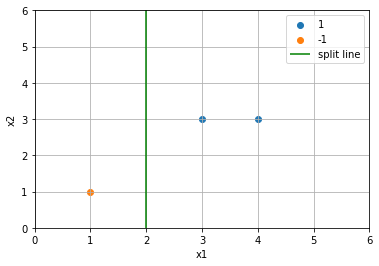

correct rate:100%


In [44]:
if __name__ == "__main__":
    main()

### 4. 总结回顾
> 1. from sklearn.linear_model import Perceptron 从sklearn中调感知机包创建模型， 关于sklearn的学习，后面给出<br>
2. 重点就是Perceptron感知模型的参数，一定要知道各个参数的含义及作用，遇到问题会调<br>
3. 这个实验，关于这个学习率对最终结果的影响，如果w，b初始值均为0的话，学习率对于这个问题，是没有影响的，如果w,b初值不是0，学习率就起作用了<br>
4. 关于正则化项， L1正则化使得特征值更加稀疏， L2正则化使得权值更加均匀<br>
5. 关于正则化系数， 过小，无约束效力，依然可能过拟合， 过大，约束的太狠，容易导致欠拟合